In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math as m

In [3]:
def fx(x):
    return m.sin((m.e**(x/2))/35)

In [4]:
a = 0
b = 10
n = 20

In [5]:
#[(b+a)/2 + ((b-a)/2)*m.cos(m.pi*(2*i-1)/(2*n)) for i in range(1 , n+1)]
#[((b-a)*i)/n for i in range(0 , n+1)]

In [6]:
def interp(x, X):
    gx = 0
    for i in X:
        mul = 1
        for j in X:
            if (j != i):
                mul = mul * ((x - j) / (i - j))
                #print(mul)
        gx = gx +fx(i) * mul
        #print(gx)
    return gx


In [7]:
def interpN(a,b,n):
    X1 = [(b+a)/2 + ((b-a)/2)*m.cos(m.pi*(2*i-1)/(2*n)) for i in range(1 , n+1)] # узлы чебышева
    X2 = [((b-a)*i)/n for i in range(0 , n+1)] # равномерная сетка
    x1 = [(X1[i]+X1[i+1])/2 for i in range(len(X1)-1)]
    x2 = [(X2[i]+X2[i+1])/2 for i in range(len(X2)-1)]
    G1 = [] # значение функ с помощью интрп в точках х
    G2 = []
    F1 = [] # значение функ в точках х
    F2 = []
    Error1 = [] # ошибка
    Error2 = []
    for xn in x1:
        G1.append(interp(xn,X1))
        F1.append(fx(xn))
    for i in range(len(G1)):
        Error1.append(G1[i]-F1[i])
    for xn in x2:
        G2.append(interp(xn,X2))
        F2.append(fx(xn))
    for i in range(len(G2)):
        Error2.append(G2[i]-F2[i])
    
    return Error1 , G1 , F1, x1, Error2 , G2 , F2, x2
        
    
        

In [8]:
print(interpN(a, b, n))

([5.436835354921676e-06, -5.258689750431422e-06, 4.611710740953789e-06, -3.81495557544298e-06, 3.0247424338547546e-06, -2.337003110364222e-06, 1.787983307743879e-06, -1.3723740649451699e-06, 1.066550039563463e-06, -8.440735254633402e-07, 6.824112021019957e-07, -5.644451582242915e-07, 4.778633294622026e-07, -4.140281240766486e-07, 3.6692788131509335e-07, -3.3234535774806506e-07, 3.0715148650189983e-07, -2.881821393949102e-07, 2.650718624458426e-07], [-0.8070077054021684, -0.5505555889675516, -0.06524614893465563, 0.5032748356577152, 0.8973656095888071, 0.9979115869195354, 0.8815360990795246, 0.6830070761469914, 0.49169425840074593, 0.34108451724160693, 0.23351676967782783, 0.16043863063713357, 0.11203734434057121, 0.0803498491342808, 0.05971008049321862, 0.04632743753992428, 0.03777047979458666, 0.03252178559955539, 0.0296855430832758], [-0.8070131422375233, -0.5505503302778012, -0.06525076064539659, 0.5032786506132907, 0.8973625848463732, 0.9979139239226458, 0.8815343110962168, 0.68300

In [9]:
error1, g1, f1, x1, error2, g2, f2, x2= interpN(a, b, n)
#1 - узлы чебышева 2 - равномерная сетка

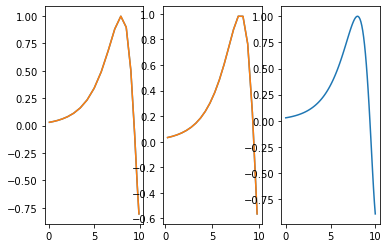

In [10]:
plt.subplot(1,3,1)
plt.plot(x1, f1)
plt.plot(x1, g1)

plt.subplot(1,3,2)
plt.plot(x2, f2)
plt.plot(x2, g2)

plt.subplot(1,3,3)
plt.plot([((a+b)*i)/100 for i in range(0 , 101)],[fx(((a+b)*i)/100) for i in range(0 , 101)])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

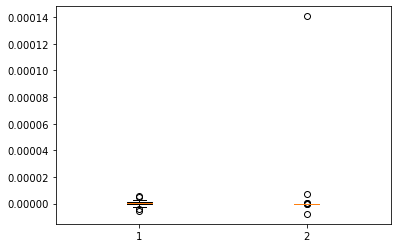

In [11]:
plt.boxplot([error1, error2])
plt.show

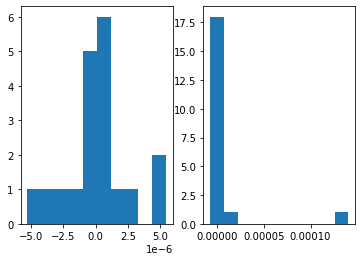

In [12]:
plt.subplot(1,2,1)
plt.hist(error1)
plt.subplot(1,2,2)
plt.hist(error2)
plt.show()

In [13]:
error1 = np.abs(error1)
error2 = np.abs(error2)
print("Ошибка для узлов Чебышева:")
print("Максимальная ошибка", np.max(error1))
print("Минимальная ошибка", np.min(error1))
print("Среднее значение:", np.mean(error1))
print("Медиана:", np.median(error1))
print("Стандартное отклонение:", np.std(error1))
print("Дисперсия:", np.var(error1))
print("-------------------")
print("Ошибка для равномерной сетки:")
print("Максимальная ошибка", np.max(error2))
print("Минимальная ошибка", np.min(error2))
print("Среднее значение:", np.mean(error2))
print("Медиана:", np.median(error2))
print("Стандартное отклонение:", np.std(error2))
print("Дисперсия:", np.var(error2))

Ошибка для узлов Чебышева:
Максимальная ошибка 5.436835354921676e-06
Минимальная ошибка 2.650718624458426e-07
Среднее значение: 1.7501760234187182e-06
Медиана: 8.440735254633402e-07
Стандартное отклонение: 1.747980584510132e-06
Дисперсия: 3.055436123824383e-12
-------------------
Ошибка для равномерной сетки:
Максимальная ошибка 0.0001407415244474297
Минимальная ошибка 1.2566836460337072e-11
Среднее значение: 7.857469817325324e-06
Медиана: 4.105186433844832e-09
Стандартное отклонение: 3.056598366855998e-05
Дисперсия: 9.342793576266756e-10


In [ ]:
'''
Заключение

Графики не достаточно информативны, но все же показывают что интерполяция эффективна.
По значениям медианы видно что в среднем метод равномерной сетки работает лучше, 
однако по значения максимума и минимума ошибки видно что узлы Чебышева стабильнее.
То есть результаты согласуются с теорией и мы получаем большую ошибку на конце равномерной сетки.

'''